In [178]:
import pandas as pd
import numpy as np
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [179]:
#Replace ? in sqft_basement column

df['sqft_basement']
df = df.replace('?' , np.nan)

In [29]:
df['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
480.0       103
450.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
360.0        72
          ...  
518.0         1
861.0         1
1798.0        1
792.0         1
2610.0        1
556.0         1
906.0         1
2350.0        1
862.0         1
475.0         1
768.0         1
1008.0        1
1852.0        1
1770.0        1
1481.0        1
2580.0        1
65.0          1
1930.0        1
283.0         1
2190.0        1
2050.0        1
652.0         1
666.0         1
417.0         1
2180.0        1
2196.0        1
3260.0        1
276.0         1
2310.0        1
1135.0        1
Name: sqft_basement, Len

In [181]:
df['age'] = 2019-df['yr_built']

In [182]:
#THIS IS My Regression

X = df[['sqft_living', 'bathrooms', 'floors', 'sqft_lot', 'grade', 'sqft_living15', 'sqft_lot15', 'age']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['price']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     4210.
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        15:00:56   Log-Likelihood:            -2.9724e+05
No. Observations:               21597   AIC:                         5.945e+05
Df Residuals:                   21588   BIC:                         5.946e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.16e+06   1.53e+04    -75.624      0.000   -1.19e+06   -1.13e+06
sqft_living     147.2185      3.575     41.176      0.000     140.210     154.226
bathrooms      4.013e+04   3565.923     11.255      0.000    3.31e+04    4.71e+04
floors         2.299e+04   3613.795      6.362      0.000    1.59e+04    3.01e+04
sqft_lot          0.0216      0.054      0.397      0.691      -0.085       0.128
grade          1.329e+05   2353.247     56.486      0.000    1.28e+05    1.38e+05
sqft_living15    32.0803      3.731      8.597      0.000      24.766      39.394
sqft_lot15       -0.4416      0.083     -5.310      0.000      -0.605      -0.279
age            4123.1319     67.386     61.186      0.000    3991.050    4255.214
==============================================================================
Omnibus:                    18154.974   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1485783.509
Skew:                           3.573   Prob(JB):                         0.00
Kurtosis:                      43.000   Cond. No.                     5.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df['price'], alpha=0.5)

TypeError: scatter() missing 1 required positional argument: 'y'

In [108]:
pd.get_dummies(df3, columns=['bedrooms', 'bathrooms', 'floors'])

,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,...,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [98]:
pd.get_dummies(df['bathrooms'])

,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,...,5.25,5.5,5.75,6.0,6.25,6.5,6.75,7.5,7.75,8.0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
hot_encoded = pd.get_dummies(df3, prefix=[])

In [106]:
hot_encoded

,bedrooms,bathrooms,floors
0,3,1.00,1.0
1,3,2.25,2.0
2,2,1.00,1.0
3,4,3.00,1.0
4,3,2.00,1.0
5,4,4.50,1.0
6,3,2.25,2.0
7,3,1.50,1.0
8,3,1.00,1.0
9,3,2.50,2.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1d286b00>,
      dtype=object)

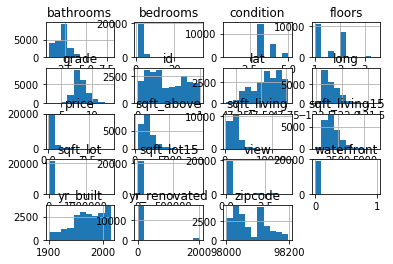

In [121]:
df.hist()

In [131]:
df['age'] = 2019-df['yr_built']

In [134]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [142]:
df['bedrooms'].replace(33.000000, np.nan)

0        3.0
1        3.0
2        2.0
3        4.0
4        3.0
5        4.0
6        3.0
7        3.0
8        3.0
9        3.0
10       3.0
11       2.0
12       3.0
13       3.0
14       5.0
15       4.0
16       3.0
17       4.0
18       2.0
19       3.0
20       4.0
21       3.0
22       5.0
23       2.0
24       3.0
25       3.0
26       3.0
27       3.0
28       3.0
29       4.0
        ... 
21567    2.0
21568    3.0
21569    3.0
21570    2.0
21571    3.0
21572    2.0
21573    3.0
21574    4.0
21575    4.0
21576    3.0
21577    5.0
21578    4.0
21579    2.0
21580    5.0
21581    4.0
21582    4.0
21583    4.0
21584    5.0
21585    3.0
21586    3.0
21587    3.0
21588    3.0
21589    4.0
21590    4.0
21591    3.0
21592    3.0
21593    4.0
21594    2.0
21595    3.0
21596    2.0
Name: bedrooms, Length: 21597, dtype: float64

In [155]:
df.iloc[].describe()

SyntaxError: invalid syntax (<ipython-input-155-0c0715bc605a>, line 1)